---

# Have you ever wondered what is the Neural Network point of view on us?

---

---

# It appears we can visualise how CNN perceives inserted images

---


---

# The idea is intuitive: 

## We will use a trained model with the goal of maximizing the given layer activation

## The goal is to CREATE a picture in the input space, which will triger the selected filter
---

In [16]:
from keras.applications import VGG16
from keras import backend as K

import matplotlib.pyplot as plt

import numpy as np

model = VGG16(weights='imagenet', include_top=False)


In [9]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x, 0, 1)
    
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [ ]:
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [10]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output

    loss = K.mean(layer_output[:, :, :, filter_index])
    
    grads = K.gradients(loss, model.input)[0]
    
    grads /= (K.sqrt(K.mean(K.square(grads)))+1e-5)
    
    iterate = K.function([model.input], [loss, grads])
    
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128
    
    step = 1

    for i in range(40):
        
        loss_value, grads_value = iterate([input_img_data])
    
        input_img_data += grads_value * step

    img = input_img_data[0]   
    
    return deprocess_image(img)
        




In [ ]:
layer_name = 'block3_conv1'
filter_index = 0



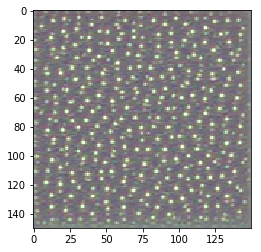

In [17]:
plt.imshow(generate_pattern(layer_name, filter_index))